In [4]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

os.chdir("/content/drive/My Drive/gulf")

Mounted at /content/drive


In [22]:
import pandas as pd

df_txn= pd.read_csv('completedtrans.csv', header=[0])

df_txn.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21
3,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,2013-01-01,10:42:35,2013-01-01T10:42:35
4,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,2013-01-02,11:39:25,2013-01-02T11:39:25


# **1. How many transactions are there in the dataset?**

In [23]:
len(df_txn.index)

1056320

# **2. What is the value of the largest transaction made and to which account/accounts was it made? a. Get the name, gender, age, and the city this client lives in**

In [27]:
df_txn.loc[df['amount'].idxmax()]

Unnamed: 0                      1047414
trans_id                      T00291346
account_id                    A00000998
type                              Debit
operation               Cash Withdrawal
amount                          87400.0
balance                         22168.9
k_symbol                            NaN
bank                                NaN
account                             NaN
year                               2018
month                                12
day                                  15
fulldate                     2018-12-15
fulltime                       13:46:25
fulldatewithtime    2018-12-15T13:46:25
Name: 1047413, dtype: object

In [51]:
df_txn.loc[df_txn['amount'].idxmax()][5]

largestValueAccID= df_txn.loc[df_txn['amount'].idxmax()][2]



In [52]:
df_disp= pd.read_csv('completeddisposition.csv', header=[0])

df_disp.head()

,disp_id,client_id,account_id,type
0,D00000001,C00000001,A00000001,Owner
1,D00000002,C00000002,A00000002,Owner
2,D00000003,C00000003,A00000002,User
3,D00000004,C00000004,A00000003,Owner
4,D00000005,C00000005,A00000003,User


In [64]:
df_disp1= df_disp[['account_id','client_id']][df_disp.account_id==largestValueAccID]
#df_disp1[['client_id']]
#df_disp1
clientID= df_disp1.iloc[0][1]
clientID

'C00001202'

In [30]:
df_client= pd.read_csv('completedclient.csv', header=[0])

df_client.head()

,client_id,sex,fulldate,day,month,year,age,social,first,middle,last,phone,email,address_1,address_2,city,state,zipcode,district_id
0,C00000001,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,emma.smith@gmail.com,387 Wellington Ave.,Unit 1,Albuquerque,NM,47246,18
1,C00000002,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,Thompson,212-423-7734,noah.thompson@gmail.com,75 W. Berkshire St.,NaN,New York City,NY,10040,1
2,C00000003,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,olivia.johnson@outlook.com,36 Second St.,NaN,New York City,NY,10162,1
3,C00000004,Male,1976-12-01,1,12,1976,43,580-20-3414,Liam,Irvin,White,951-567-8925,liam.white@gmail.com,7607 Sunnyslope Street,NaN,Indianapolis,IN,49047,5
4,C00000005,Female,1980-07-03,3,7,1980,39,536-14-5809,Sophia,Danae,Williams,428-265-1568,sophia.williams@gmail.com,755 Galvin Street,NaN,Indianapolis,IN,40852,5


In [67]:
df_client1= df_client[['first','middle','last','sex','age','city']][df_client.client_id==clientID]
df_client1


,first,middle,last,sex,age,city
1144,Johanna,Danna,Summers,Female,19,Charleston


In [69]:
df_client1.iloc[0][0]

'Johanna'

In [72]:
print('Value of the largest txn: ', largestValueAccID)
print("name,gender,age,and the city this client lives in", 
      df_client1.iloc[0][0],' , ', df_client1.iloc[0][1],' , ',
      df_client1.iloc[0][2],' , ', df_client1.iloc[0][3],' , ',
      df_client1.iloc[0][4],' , ', df_client1.iloc[0][5])

Value of the largest txn:  A00000998
name,gender,age,and the city this client lives in Johanna  ,  Danna  ,  Summers  ,  Female  ,  19  ,  Charleston


# **3. Which account(s) had the largest balance and what date was this? How does this compare to the balance of this account to the latest date?**

In [77]:

max_txn_value = df_txn['balance'].max()
max_txn_value

209637.0

In [92]:
df_txn

,Unnamed: 0,trans_id,account_id,type,operation,amount,balance,k_symbol,bank,account,year,month,day,fulldate,fulltime,fulldatewithtime
0,1,T00695247,A00002378,Credit,Credit in Cash,700.0,700.0,NaN,NaN,NaN,2013,1,1,2013-01-01,11:02:40,2013-01-01T11:02:40
1,2,T00171812,A00000576,Credit,Credit in Cash,900.0,900.0,NaN,NaN,NaN,2013,1,1,2013-01-01,08:23:33,2013-01-01T08:23:33
2,3,T00207264,A00000704,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,NaN,2013,1,1,2013-01-01,15:19:21,2013-01-01T15:19:21
3,4,T01117247,A00003818,Credit,Credit in Cash,600.0,600.0,NaN,NaN,NaN,2013,1,1,2013-01-01,10:42:35,2013-01-01T10:42:35
4,5,T00579373,A00001972,Credit,Credit in Cash,400.0,400.0,NaN,NaN,NaN,2013,1,2,2013-01-02,11:39:25,2013-01-02T11:39:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,1056316,T03626622,A00002906,Credit,NaN,62.3,13729.4,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,15:18:14,2018-12-31T15:18:14
1056316,1056317,T03627616,A00002935,Credit,NaN,81.3,19544.9,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,13:04:60,2018-12-31T13:04:60
1056317,1056318,T03625403,A00002869,Credit,NaN,60.2,14638.2,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,08:30:13,2018-12-31T08:30:13
1056318,1056319,T03626683,A00002907,Credit,NaN,107.5,23453.0,Interest Credited,NaN,NaN,2018,12,31,2018-12-31,14:45:19,2018-12-31T14:45:19


In [96]:
df_txn2= df_txn[['account_id','balance','fulldate']][df_txn.balance==max_txn_value]
#df_txn2
print('largest balance is: ', max_txn_value,
      ' \nrelated to account number: ' ,df_txn2.iloc[0][0],
      '\ndate: ', df_txn2.iloc[0][2])

largest balance is:  209637.0  
related to account number:  A00010520 
date:  2017-05-06


In [103]:
df_txn3= df_txn[['account_id','balance','fulldate']][df_txn.account_id ==df_txn2.iloc[0][0]].sort_values(by=['fulldate'])
df_txn3.iloc[-1]

account_id     A00010520
balance          28240.1
fulldate      2018-12-31
Name: 1056203, dtype: object

In [105]:
print(' balance of this account to the latest date: ', df_txn3.iloc[-1][1])

 balance of this account to the latest date:  28240.1


# **4. Create a histogram and box plot displaying the amounts distribution**

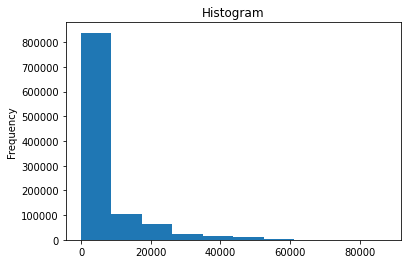

In [128]:
import matplotlib.pyplot as plt
df_txn['amount'].plot(kind='hist', title='Histogram')
plt.show()

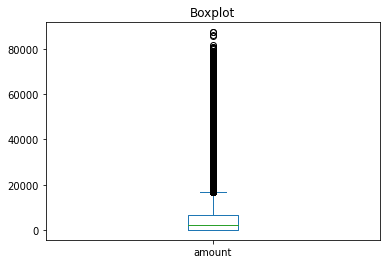

In [129]:
df_txn['amount'].plot(kind='box', title='Boxplot')
plt.show()


# **5. Split the amounts into bins:**

In [130]:
df_txn_ordered= df_txn.sort_values(by = ['amount'],  ascending=True)

In [134]:
import numpy as np
new = np.array_split(df_txn_ordered.T, 11)

In [145]:
amountBins={
    '<100': [],
    '100-250': [],
    '250-500': [],
    '500-1K': [],
    '1K-2K': [],
    '2K-4K': [],
    '4K-8K': [],
    '8K-15K': [],
    '15K-30K': [],
    '30K-60K': [],
    '>60K':[]
}

In [148]:
for index, row in df_txn_ordered.iterrows():
  row= int(row[0])
  if row<100:
    amountBins['<100'].append(row)
  elif row>=100 and row<250:
    amountBins['100-250'].append(row)
  elif row>=250 and row<500:
    amountBins['250-500'].append(row)
  elif row>=500 and row<1000:
    amountBins['500-1K'].append(row)
  elif row>=1000 and row<2000:
    amountBins['1K-2K'].append(row)
  elif row>=2000 and row<4000:
    amountBins['2K-4K'].append(row)
  elif row>=4000 and row<8000:
    amountBins['4K-8K'].append(row)
  elif row>=8000 and row<15000:
    amountBins['8K-15K'].append(row)
  elif row>=15000 and row<30000:
    amountBins['15K-30K'].append(row)
  elif row>=30000 and row<60000:
    amountBins['30K-60K'].append(row)
  elif row>=60000:
    amountBins['>60K'].append(row)

In [198]:

len(amountBins['<100'])

99

In [149]:
amountBins

{'100-250': [173,
  156,
  143,
  147,
  138,
  140,
  150,
  163,
  173,
  156,
  143,
  147,
  138,
  140,
  150,
  163,
  173,
  156,
  143,
  147,
  138,
  140,
  150,
  163,
  166,
  144,
  151,
  142,
  162,
  169,
  164,
  176,
  175,
  154,
  161,
  145,
  174,
  170,
  141,
  153,
  152,
  155,
  171,
  165,
  149,
  139,
  158,
  148,
  146,
  159,
  168,
  157,
  172,
  106,
  128,
  126,
  117,
  113,
  180,
  242,
  188,
  129,
  110,
  104,
  133,
  134,
  199,
  100,
  125,
  203,
  127,
  108,
  221,
  124,
  194,
  189,
  233,
  218,
  227,
  197,
  193,
  206,
  118,
  102,
  136,
  123,
  186,
  195,
  109,
  103,
  111,
  214,
  121,
  198,
  112,
  192,
  135,
  132,
  185,
  182,
  119,
  122,
  179,
  116,
  223,
  247,
  177,
  160,
  200,
  208,
  228,
  240,
  219,
  241,
  243,
  213,
  238,
  231,
  230,
  211,
  236,
  235,
  178,
  204,
  210,
  167,
  244,
  226,
  183,
  249,
  225,
  187,
  212,
  232,
  196,
  184,
  216,
  207,
  234,
  224,
  181,
  

# **9. Which top/bottom 3 banks have the highest count of transactions?**

# **10. Which top/bottom 3 banks have the highest value of transactions?**

In [175]:
df_txn_banks= df_txn['bank'].dropna().drop_duplicates()
num_banks= len(df_txn_banks)

In [199]:
countsDict={}
amountDict={}
for i in range(0,num_banks):
  df_txn_bnk= df_txn[['amount']][df_txn.bank==df_txn_banks.iloc[i]]
  amnt_col= df_txn_bnk["amount"]
  max_amount= amnt_col.sum()
  countsDict[df_txn_banks.iloc[i]]=len(amnt_col.index)
  amountDict[df_txn_banks.iloc[i]]=max_amount

countsDict

{'Bank of America': 19597,
 'Bank of New York Mellon Corp.': 21167,
 'Capital One': 21711,
 'Charles Schwab Corp.': 20178,
 'Citigroup': 21293,
 'Goldman Sachs': 20525,
 'JPMorgan Chase': 21720,
 'Morgan Stanley': 21234,
 'PNC Financial Services': 21094,
 'State Street Corp.': 21582,
 'TD Bank': 22285,
 'U.S. Bancorp': 19623,
 'Wells Fargo & Co.': 21499}

In [200]:
countsKeys= sorted(countsDict, key=countsDict.get, reverse=True)[:3]
print('top 3 banks in transaction counts: ', countsKeys )

countsKeys= sorted(countsDict, key=countsDict.get, reverse=False)[:3]
print('bottom 3 banks in transaction counts: ', countsKeys )

countsKeys= sorted(amountDict, key=amountDict.get, reverse=True)[:3]
print('top 3 banks in transaction amount: ', countsKeys )

countsKeys= sorted(amountDict, key=amountDict.get, reverse=False)[:3]
print('bottom 3 banks in transaction amount: ', countsKeys )

top 3 banks in transaction counts:  ['TD Bank', 'JPMorgan Chase', 'Capital One']
bottom 3 banks in transaction counts:  ['Bank of America', 'U.S. Bancorp', 'Charles Schwab Corp.']
top 3 banks in transaction amount:  ['Capital One', 'Wells Fargo & Co.', 'Bank of New York Mellon Corp.']
bottom 3 banks in transaction amount:  ['U.S. Bancorp', 'Charles Schwab Corp.', 'Bank of America']
